<a href="https://colab.research.google.com/github/8noira/mysite/blob/master/PR_PCA_week4_gup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

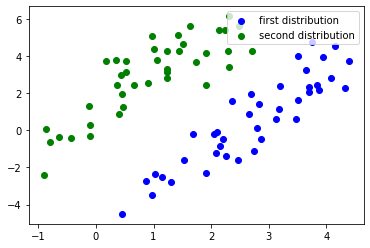

In [ ]:
# Implement your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

mu1=np.array([3,1])
sigma1=np.array([[1,2],[2,5]])

mu2=np.array([1,3])
sigma2=np.array([[1,2],[2,5]])

data_1=np.random.multivariate_normal(mu1,sigma1,size=40)
data_2=np.random.multivariate_normal(mu2,sigma2,size=40)
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)

plt.scatter(data_1[:,0],data_1[:,1],label='first distribution',color='blue')
plt.scatter(data_2[:,0],data_2[:,1],label='second distribution',color='green')
plt.legend(loc='upper right')
plt.show()

## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)


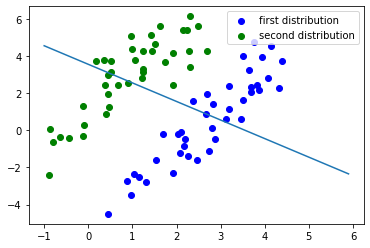

In [ ]:
# Implement your code here
class PCA:

    def __init__(self):
        #normalization
        self.standardscaler = None
        #covariance matrix
        self.v_cov = None
        #eigenvalue
        self.eig = None
        #eigen vector
        self.eig_vec = None
        self.cont_rate=None

    def fit(self,x):
        self.standardscaler = (x - x.mean())/x.std(ddof=0)
        self.v_cov=np.cov(self.standardscaler.T,bias=0)
        self.eig,self.eig_vec=np.linalg.eig(self.v_cov)
        self.cont_rate=self.eig/self.eig.sum()

    def transfer(self, n_components):
        return np.dot(self.standardscaler, self.eig_vec[:,:n_components])
df_all=pd.concat([df1,df2])
pca=PCA()
pca.fit(df_all)
mean=df_all.mean()
xlist = np.arange(-1.0,6.0,0.1)
ylist = mean[1] + (pca.eig_vec[0,1]/pca.eig_vec[0,0]) * (xlist - mean[0])

plt.scatter(data_1[:,0],data_1[:,1],label='first distribution',color='blue')
plt.scatter(data_2[:,0],data_2[:,1],label='second distribution',color='green')
plt.plot(xlist,ylist)
plt.legend(loc='upper right')
plt.show()

## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

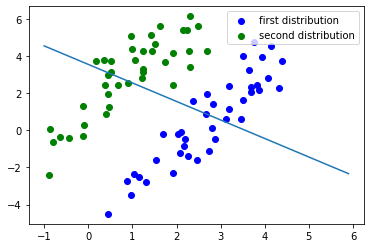

In [ ]:
# Implement your code here
df_cls1_cp=df1
df_cls2_cp=df2
st=StandardScaler()
df_cls1=st.fit_transform(df_cls1_cp)
df_cls2=st.fit_transform(df_cls2_cp)

mean1=np.mean(df_cls1,axis=0)
mean2=np.mean(df_cls2,axis=0)

dim=2
Sw=np.zeros((dim,dim))

for xn in df_cls1:
  xn = xn.reshape(dim,1)
  mean1 = mean1.reshape(dim,1)
  Sw += np.dot((xn-mean1),(xn-mean1).T)

for xn in df_cls2:
  xn = xn.reshape(dim,1)
  mean2 = mean2.reshape(dim,1)
  Sw += np.dot((xn-mean2),(xn-mean2).T)

Sw_inv = np.linalg.inv(Sw)
w = np.dot(Sw_inv,(mean2-mean1))

mean=df_all.mean()
x_ln = np.arange(-1.0,6.0,0.1)
y_ln = mean[1] + (w[1]/w[0]) * (x_ln - mean[0])

plt.scatter(data_1[:,0],data_1[:,1],label='first distribution',color='blue')
plt.scatter(data_2[:,0],data_2[:,1],label='second distribution',color='green')
plt.plot(x_ln,y_ln)
plt.legend(loc='upper right')
plt.show()


# Submit your PDF

1. Type `Ctrl-P` or select `File`->`Print` menu.
2. Select `Save as PDF` in the printer selection box, and click `Save`.
3. Upload the downloaded PDF to PandA.

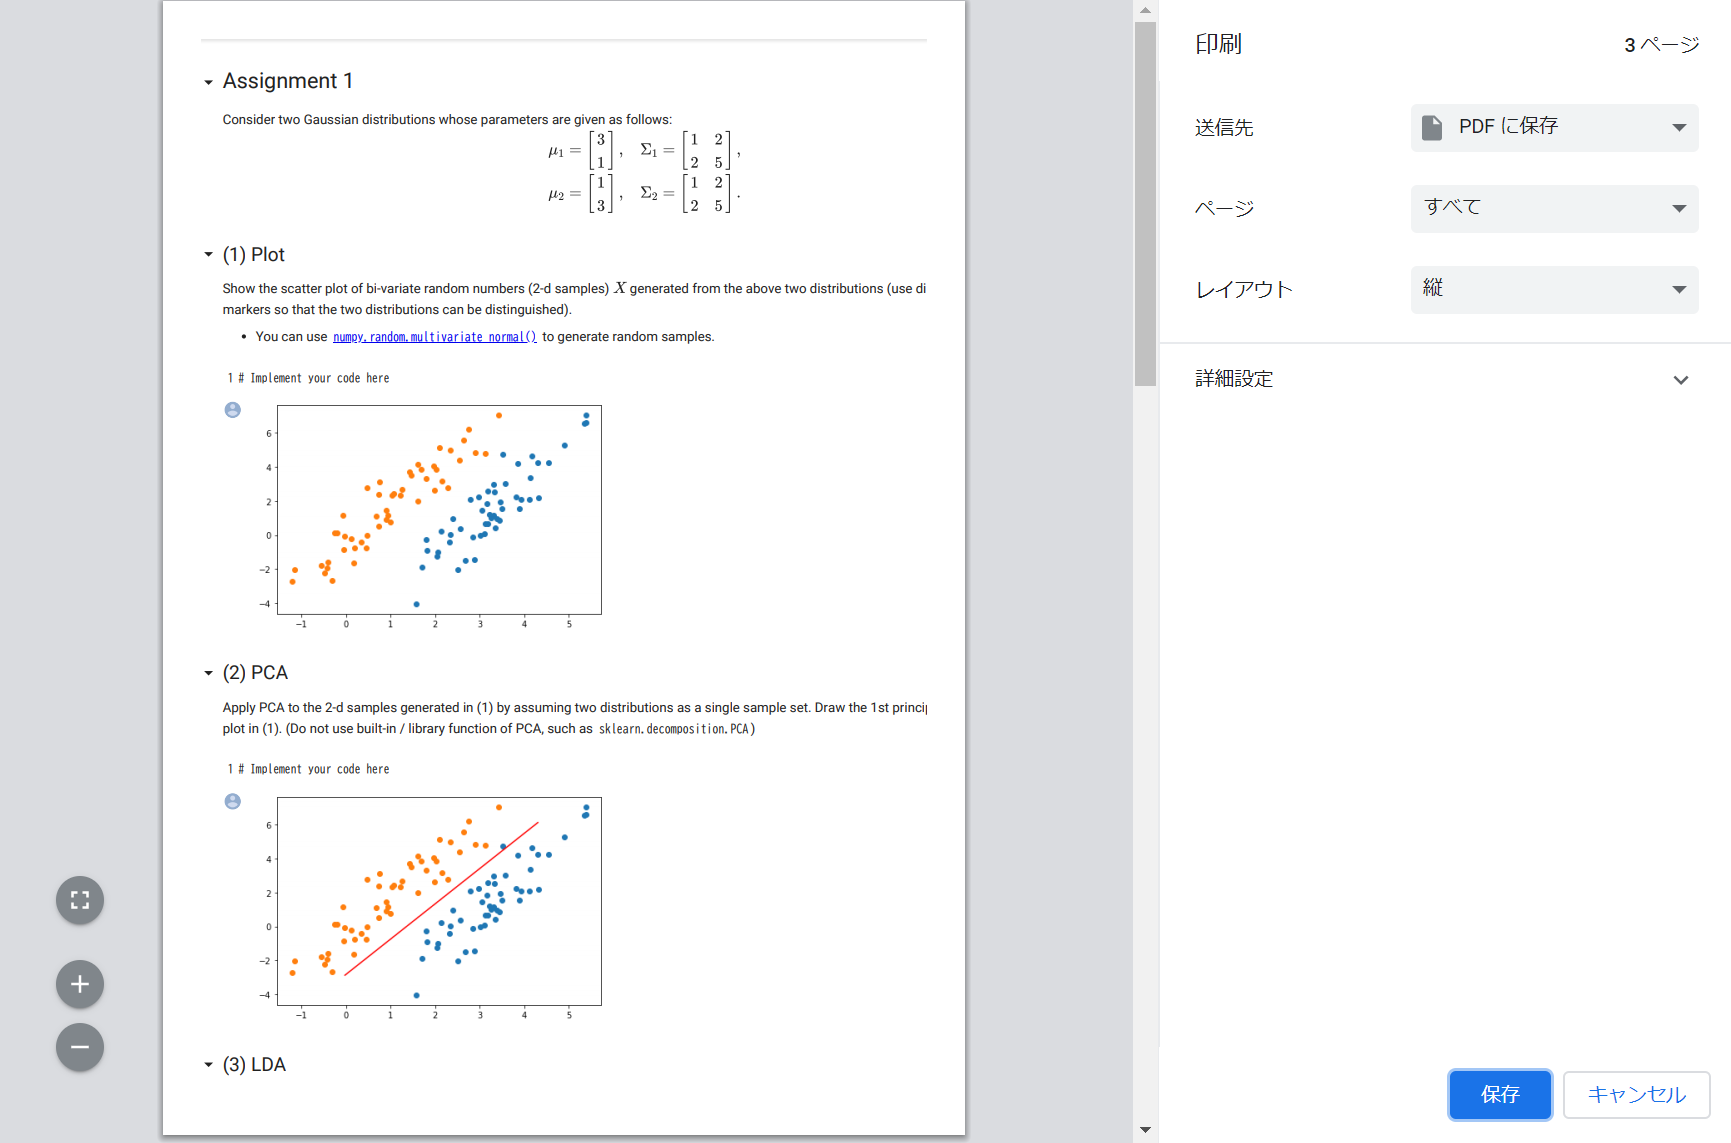

